[2024-11-22 Fiddler](https://thefiddler.substack.com/p/can-you-fold-the-hexagon)
====================

I'll assume that the shapes are infinitely thin so that there are no issues with folding
multiple layers.

Fiddler
-------

(My answer is [wrong](https://thefiddler.substack.com/p/did-xkcd-get-its-math-right),
as there are first folds in addition to folding in half, similarly for the extra credit.)

There are 8 possible sequences of folds that lead to 6 distinct packets.

In [1]:
def pic(tops,folds,ix,iy,layers=''):
    x = ix*2.4 - (1 if ix > 3 else 0)
    y = -iy*2.4
    p = circle((x,y),0.02,color='black',fill=true,axes=false)
    for i in [0..5]:
        if tops[i] != None:
            t = i*pi/3
            x1 = x+sin(t-pi/6)
            y1 = y-cos(t-pi/6)
            x2 = x+sin(t+pi/6)
            y2 = y-cos(t+pi/6)
            p += line([(x1,y1),(x2,y2)],color='black')
            p += line([(x,y),(x1,y1)],color='red' if folds[0] == i or folds[1] == mod(i-1,6) else 'black',
                      linestyle='dashed' if tops[mod(i-1,6)] == mod(i-1,6) else 'solid')
            p += line([(x,y),(x2,y2)],color='red' if folds[0] == mod(i+1,6) or folds[1] == i else 'black',
                      linestyle='dashed' if tops[mod(i+1,6)] == mod(i+1,6) else 'solid')
            p += text(f"{tops[i]}",(x+0.6*sin(t),y-0.6*cos(t)),fontsize=8,fontweight='heavy',color='#aaa',
                     rotation=60*i)
    p += text(layers,(x,y+0.5),fontsize=8,color='#444')
    return p

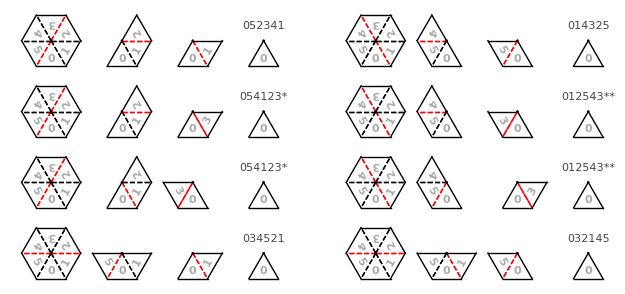

In [2]:
(pic([0,1,2,3,4,5],[0,2],0,0)
 + pic([0,1,2,None,None,None],[2,None],1,0)
 + pic([0,1,None,None,None,None],[1,None],2,0)
 + pic([0,None,None,None,None,None],[None,None],3,0,layers='052341')
 + pic([0,1,2,3,4,5],[0,2],0,1)
 + pic([0,1,2,None,None,None],[2,None],1,1)
 + pic([0,3,None,None,None,None],[1,None],2,1)
 + pic([0,None,None,None,None,None],[None,None],3,1,layers='054123*')
 + pic([0,1,2,3,4,5],[0,2],0,2)
 + pic([0,1,2,None,None,None],[1,None],1,2)
 + pic([0,None,None,None,None,3],[0,None],2,2)
 + pic([0,None,None,None,None,None],[None,None],3,2,layers='054123*')
 + pic([0,1,2,3,4,5],[1,3],5,0)
 + pic([0,None,None,None,4,5],[5,None],6,0)
 + pic([0,None,None,None,None,5],[0,None],7,0)
 + pic([0,None,None,None,None,None],[None,None],8,0,layers='014325')
 + pic([0,1,2,3,4,5],[1,3],5,1)
 + pic([0,None,None,None,4,5],[5,None],6,1)
 + pic([0,None,None,None,None,3],[0,None],7,1)
 + pic([0,None,None,None,None,None],[None,None],8,1,layers='012543**')
 + pic([0,1,2,3,4,5],[1,3],5,2)
 + pic([0,None,None,None,4,5],[0,None],6,2)
 + pic([0,3,None,None,None,None],[1,None],7,2)
 + pic([0,None,None,None,None,None],[None,None],8,2,layers='012543**')
 + pic([0,1,2,3,4,5],[5,1],0,3)
 + pic([0,1,None,None,None,5],[0,None],1,3)
 + pic([0,1,None,None,None,None],[1,None],2,3)
 + pic([0,None,None,None,None,None],[None,None],3,3,layers='034521')
 + pic([0,1,2,3,4,5],[5,1],5,3)
 + pic([0,1,None,None,None,5],[1,None],6,3)
 + pic([0,None,None,None,None,5],[0,None],7,3)
 + pic([0,None,None,None,None,None],[None,None],8,3,layers='032145')
)

Extra credit
------------

There are 4 first folds.  Due to symmetry, we only need to consider 2 of them, then
multiply the result by 2.

In [3]:
def picx(tops,folds,ix,iy,layers=''):
    x = ix*2.4 - (1 if ix > 4 else 0)
    y = -iy*2.4
    p = circle((x,y),0.02,color='black',fill=true,axes=false)
    for i in [0..7]:
        if tops[i] != None:
            t = i*pi/4
            x1 = x+sin(t-pi/8)
            y1 = y-cos(t-pi/8)
            x2 = x+sin(t+pi/8)
            y2 = y-cos(t+pi/8)
            p += line([(x1,y1),(x2,y2)],color='black')
            p += line([(x,y),(x1,y1)],color='red' if folds[0] == i or folds[1] == mod(i-1,8) else 'black',
                      linestyle='dashed' if tops[mod(i-1,8)] == mod(tops[i]-1,8) else 'solid')
            p += line([(x,y),(x2,y2)],color='red' if folds[0] == mod(i+1,8) or folds[1] == i else 'black',
                      linestyle='dashed' if tops[mod(i+1,8)] == mod(tops[i]+1,8) else 'solid')
            p += text(f"{tops[i]}",(x+0.6*sin(t),y-0.6*cos(t)),fontsize=8,fontweight='heavy',color='#aaa',
                     rotation=45*i)
    p += text(layers,(x,y+0.5),fontsize=8,color='#444')
    return p

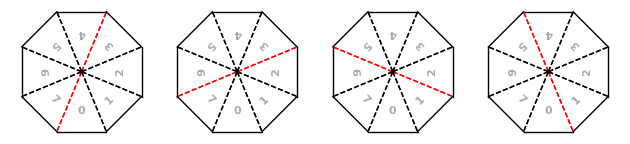

In [4]:
(picx([0..7],[0,3],0,0)
 + picx([0..7],[7,2],1,0)
 + picx([0..7],[6,1],2,0)
 + picx([0..7],[5,0],3,0))

There are 10 folding sequences when the first fold is next to the 0, leading to 4 distinct packets.

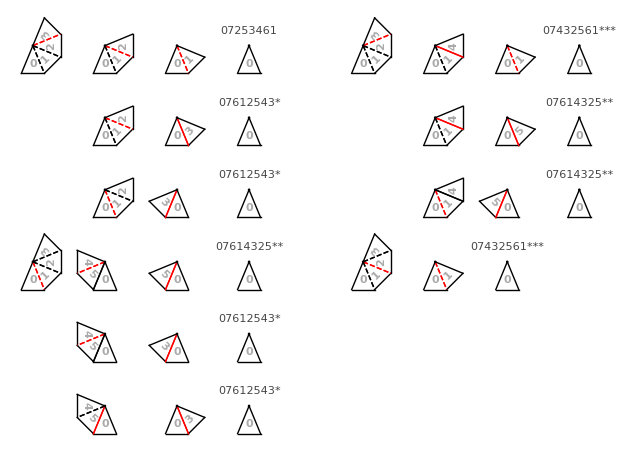

In [5]:
(picx([0,1,2,3,None,None,None,None],[3,None],0,0)
 + picx([0,1,2,None,None,None,None,None],[2,None],1,0)
 + picx([0,1,None,None,None,None,None,None],[1,None],2,0)
 + picx([0,None,None,None,None,None,None,None],[None,None],3,0,layers='07253461')
 + picx([0,1,2,None,None,None,None,None],[2,None],1,1)
 + picx([0,3,None,None,None,None,None,None],[1,None],2,1)
 + picx([0,None,None,None,None,None,None,None],[None,None],3,1,layers='07612543*')
 + picx([0,1,2,None,None,None,None,None],[1,None],1,2)
 + picx([0,None,None,None,None,None,None,3],[0,None],2,2)
 + picx([0,None,None,None,None,None,None,None],[None,None],3,2,layers='07612543*')
 + picx([0,1,2,3,None,None,None,None],[3,None],5,0)
 + picx([0,1,4,None,None,None,None,None],[2,None],6,0)
 + picx([0,1,None,None,None,None,None,None],[1,None],7,0)
 + picx([0,None,None,None,None,None,None,None],[None,None],8,0,layers='07432561***')
 + picx([0,1,4,None,None,None,None,None],[2,None],6,1)
 + picx([0,5,None,None,None,None,None,None],[1,None],7,1)
 + picx([0,None,None,None,None,None,None,None],[None,None],8,1,layers='07614325**')
 + picx([0,1,4,None,None,None,None,None],[1,None],6,2)
 + picx([0,None,None,None,None,None,None,5],[0,None],7,2)
 + picx([0,None,None,None,None,None,None,None],[None,None],8,2,layers='07614325**')
 + picx([0,1,2,3,None,None,None,None],[2,None],5,3)
 + picx([0,1,None,None,None,None,None,None],[1,None],6,3)
 + picx([0,None,None,None,None,None,None,None],[None,None],7,3,layers='07432561***')
 + picx([0,1,2,3,None,None,None,None],[1,None],0,3)
 + picx([0,None,None,None,None,None,4,5],[7,None],1,3)
 + picx([0,None,None,None,None,None,None,5],[0,None],2,3)
 + picx([0,None,None,None,None,None,None,None],[None,None],3,3,layers='07614325**')
 + picx([0,None,None,None,None,None,4,5],[7,None],1,4)
 + picx([0,None,None,None,None,None,None,3],[0,None],2,4)
 + picx([0,None,None,None,None,None,None,None],[None,None],3,4,layers='07612543*')
 + picx([0,None,None,None,None,None,4,5],[0,None],1,5)
 + picx([0,3,None,None,None,None,None,None],[1,None],2,5)
 + picx([0,None,None,None,None,None,None,None],[None,None],3,5,layers='07612543*')
)

When the first fold is not next to the 0, there are 8 folding sequences leading to 4
distinct packets.

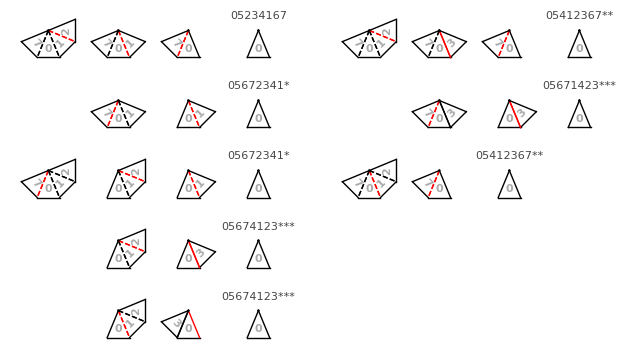

In [6]:
(picx([0,1,2,None,None,None,None,7],[2,None],0,0)
 + picx([0,1,None,None,None,None,None,7],[1,None],1,0)
 + picx([0,None,None,None,None,None,None,7],[0,None],2,0)
 + picx([0,None,None,None,None,None,None,None],[None,None],3,0,layers='05234167')
 + picx([0,1,None,None,None,None,None,7],[0,None],1,1)
 + picx([0,1,None,None,None,None,None,None],[1,None],2,1)
 + picx([0,None,None,None,None,None,None,None],[None,None],3,1,layers='05672341*')
 + picx([0,1,2,None,None,None,None,7],[2,None],5,0)
 + picx([0,3,None,None,None,None,None,7],[1,None],6,0)
 + picx([0,None,None,None,None,None,None,7],[0,None],7,0)
 + picx([0,None,None,None,None,None,None,None],[None,None],8,0,layers='05412367**')
 + picx([0,3,None,None,None,None,None,7],[0,None],6,1)
 + picx([0,3,None,None,None,None,None,None],[1,None],7,1)
 + picx([0,None,None,None,None,None,None,None],[None,None],8,1,layers='05671423***')
 + picx([0,1,2,None,None,None,None,7],[1,None],5,2)
 + picx([0,None,None,None,None,None,None,7],[0,None],6,2)
 + picx([0,None,None,None,None,None,None,None],[None,None],7,2,layers='05412367**')
 + picx([0,1,2,None,None,None,None,7],[0,None],0,2)
 + picx([0,1,2,None,None,None,None,None],[2,None],1,2)
 + picx([0,1,None,None,None,None,None,None],[1,None],2,2)
 + picx([0,None,None,None,None,None,None,None],[None,None],3,2,layers='05672341*')
 + picx([0,1,2,None,None,None,None,None],[2,None],1,3)
 + picx([0,3,None,None,None,None,None,None],[1,None],2,3)
 + picx([0,None,None,None,None,None,None,None],[None,None],3,3,layers='05674123***')
 + picx([0,1,2,None,None,None,None,None],[1,None],1,4)
 + picx([0,None,None,None,None,None,None,3],[1,None],2,4)
 + picx([0,None,None,None,None,None,None,None],[None,None],3,4,layers='05674123***')
)

That adds up to 8 distinct packets, and, with symmetry for the other two
first folds, makes 16 distinct packets.

### Polygons with more sides
Considering folding regular polygons with $2n$ sides by the same rules.

Each packet can be made from between $1+\log_2n$ and $n$ folds.

Using code

In [7]:
def first_folds(n):
    for i in [0..n-1]:
        yield [[mod(i-j,2*n),mod(i+1+j,2*n)] for j in [0..n-1]]

def zero_faces_out(p):
    return any(map(lambda p: p[0] == 0 or p[-1] == 0, p))

def fold_1(p,i,up):
    l = len(p)
    if up:
        return [(list(reversed(p[i+j])) if i+j < l else [])
                + (p[i-1-j] if i-1-j >= 0 else [])
                for j in [0..max(i-1,l-i-1)]]
    else:
        return [(p[i-1-j] if i-1-j >= 0 else [])
                + (list(reversed(p[i+j])) if i+j < l else [])
                for j in [0..max(i-1,l-i-1)]]

def fold_packets(p):
    l = len(p)
    if l == 1:
        if p[0][0] == 0:
            yield tuple(p[0])
        elif p[0][-1] == 0:
            yield tuple(reversed(p[0]))
    else:
        for i in [1..l-1]:
            pp = fold_1(p,i,true)
            if zero_faces_out(pp):
                for ppp in fold_packets(pp):
                    yield ppp
            pp = fold_1(p,i,false)
            if zero_faces_out(pp):
                for ppp in fold_packets(pp):
                    yield ppp

def packets(n):
    for p in first_folds(n):
        for pp in fold_packets(p):
            yield pp

In [8]:
[len(set(packets(n))) for n in [2..8]]

[2, 6, 16, 50, 144, 448, 1328]

This confirms my answers of 6 and 16.  This sequence was not in
[OEIS](https://oeis.org/search?q=2%2C6%2C16%2C50%2C144%2C448%2C1328%2C4052%2C12040)
at the time of writing.

A [reimplemention in Haskell](20241122.hs) is marginally faster.   The results for
a square up to a regular 22-gon:

    $ runghc 20241122.hs
    [2,6,16,50,144,448,1328,4052,12040,36152]

Maybe there is a sequence for the number of distinct packets without having one
of them on top.

In [9]:
def fold_packets_2(p):
    l = len(p)
    if l == 1:
        yield tuple(p[0] if p[0][0] < p[0][-1] else reversed(p[0]))
    else:
        for i in [1..l-1]:
            pp = fold_1(p,i,true)
            for ppp in fold_packets_2(pp):
                yield ppp
            pp = fold_1(p,i,false)
            for ppp in fold_packets_2(pp):
                yield ppp

def packets_2(n):
    for p in first_folds(n):
        for pp in fold_packets_2(p):
            yield pp

In [10]:
[len(set(packets_2(n))) for n in [2..8]]

[4, 18, 64, 250, 864, 3136, 10624]

It's just $na_n$, where $a_n$ is the previous sequence of the number of distinct packets
with 0 on top.  And that's not in
[OEIS](https://oeis.org/search?q=4%2C18%2C64%2C250%2C864%2C3136%2C10624%2C36468%2C120400)
either.

Making the rounds
-----------------

I speculate that the points need to be as far as possible from each other and as
far as possible from the edges of the square, and balancing these concerns will
give the locations of the points.  That would put the points opposite each other on
a diagonal, both the same distance from the center.

Let the square be $0 < x < 1$ and $0 < y < 1$, and let the points be at $(t,t)$ and
$(1-t,1-t)$.

Then, the average distance would be
$4\int_0^{1/2} dx\int_{x}^{1-x} dy\sqrt{(x-t)^2+(y-t)^2}$,

In [11]:
x1,x2,y,t = var('x1,x2,y,t')
forget()
assume(t, 'real')
assume(x1, 'real')
assume(x2, 'real')
assume(y, 'real')
assume(t > 0, t < 1/2)
assume(x1 > 0, x1 < t, x2 > t, x2 < 1/2)
# d(t) = integral(integral(sqrt((x1-t)^2+(y-t)^2),y,x1,1-x1),x1,0,t)*4 \
#    + integral(integral(sqrt((x2-t)^2+(y-t)^2),y,x2,1-x2),x2,t,1/2)*4

And the computer has lots of trouble with the integrals, so I'll take another
approach.

Since calculating the average of the square of the distance is so much more tractable
than calculating the average of the distance, that could be one approach to get a first
approximation.  Using the square of the distance will emphasize the more distant points
so when it comes to a tradeoff between making a larger but nearer area farther or making
a smaller more distant area farther, the minimizing the average of the distance versus
minimizing the average of the square of the distance could push the points in opposite
directions in some cases.

Let the positions of the points be $(x_1,y_1)$ and $(x_2,y_2)$.  Without any loss of
generality, let $x_1 \le x_2$ and $y_1 < y_2$, since reflections and 90° rotations don't
affect the distances.

The line equidistant to the points is

In [12]:
line_12(x1,y1,x2,y2,x) = (y1+y2)/2 + (x1-x2)/(y2-y1)*(x - (x1+x2)/2)

In [13]:
xtop(x1,y1,x2,y2) = cases([(x1 == x2,0),
                           (true,max_symbolic(0,solve(line_12(x1,y1,x2,y2,x) == 1, x)[0].rhs()))])
xbot(x1,y1,x2,y2) = cases([(x1 == x2,1),
                           (true,min_symbolic(1,solve(line_12(x1,y1,x2,y2,x) == 0, x)[0].rhs()))])
ad_12(x1,y1,x2,y2) = \
    (integral(integral((x-x1)^2+(y-y1)^2,y,0,1),x,0,xtop(x1,y1,x2,y2))
     + integral(integral((x-x1)^2+(y-y1)^2,y,0,line_12(x1,y1,x2,y2,x)),x,xtop(x1,y1,x2,y2),xbot(x1,y1,x2,y2))
     + integral(integral((x-x2)^2+(y-y2)^2,y,line_12(x1,y1,x2,y2,x),1),x,xtop(x1,y1,x2,y2),xbot(x1,y1,x2,y2))
     + integral(integral((x-x2)^2+(y-y2)^2,y,0,1),x,xbot(x1,y1,x2,y2),1))

In [14]:
def t(x1,y1,x2,y2,xoff,yoff):
    return (polygon([(xoff,yoff),(xoff,yoff+1),
                     (xoff+xtop(x1,y1,x2,y2),yoff+line_12(x1,y1,x2,y2,xtop(x1,y1,x2,y2))),
                     (xoff+xbot(x1,y1,x2,y2),yoff+line_12(x1,y1,x2,y2,xbot(x1,y1,x2,y2))),
                     (xoff+xbot(x1,y1,x2,y2),yoff)],
                    axes=false,color='#fee')
            + polygon([(xoff+1,yoff+1),
                       (xoff+xtop(x1,y1,x2,y2),yoff+1),
                       (xoff+xtop(x1,y1,x2,y2),yoff+line_12(x1,y1,x2,y2,xtop(x1,y1,x2,y2))),
                       (xoff+xbot(x1,y1,x2,y2),yoff+line_12(x1,y1,x2,y2,xbot(x1,y1,x2,y2))),
                       (xoff+xbot(x1,y1,x2,y2),yoff),
                       (xoff+1,yoff)],
                      color='#eef')
            + polygon([(xoff,yoff),(xoff+1,yoff),(xoff+1,yoff+1),(xoff,yoff+1)],
                    fill=None,color='black')
            + circle((xoff+x1,yoff+y1),0.01,color='red')
            + circle((xoff+x2,yoff+y2),0.01,color='blue')
            + plot(yoff+line_12(x1,y1,x2,y2,x-xoff),x,xoff+xtop(x1,y1,x2,y2),xoff+xbot(x1,y1,x2,y2),
                   linestyle='dotted',color='gray')
            + text(f"⟨d²⟩={ad_12(x1,y1,x2,y2)}≈{numerical_approx(ad_12(x1,y1,x2,y2))}",(xoff+0.5,yoff-0.1),
                   color='black',fontsize=9))

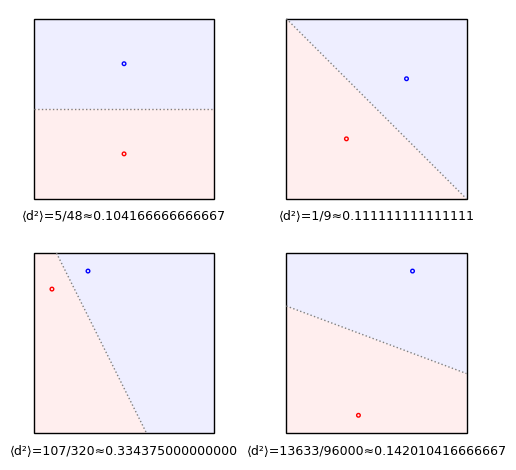

In [15]:
(t(1/2,1/4,1/2,3/4,0,0) +
 t(1/3,1/3,2/3,2/3,1.4,0) +
 t(1/10,8/10,3/10,9/10,0,-1.3) +
 t(4/10,1/10,7/10,9/10,1.4,-1.3))

In [16]:
minimize_constrained(lambda p: ad_12(p[0],p[1],p[2],p[3]),
                     lambda p: 1 if p[0] > 0 and p[1] > 0 and p[0] <= p[2]
                     and p[1] < p[3] and p[2] < 1 and p[3] < 1 else -1,
                     (1/10,1/10,9/10,9/10))

(-0.7243713497190242, -0.021572988368483353, 0.5001841613986082, 0.5000141749470269)

It looks like the minimization algorithm doesn't honor the constraints, try another
approach.

In [17]:
def f(p):
    if p[0] <= p[2]:
        if p[1] < p[3]:
            return ad_12(p[0],p[1],p[2],p[3])
        else:
            return ad_12(p[0],1-p[1],p[2],1-p[3])
    else:
        if p[3] < p[1]:
            return ad_12(p[2],p[3],p[0],p[1])
        else:
            return ad_12(p[2],1-p[3],p[0],1-p[1])

minimize_constrained(f, [(0,1),(0,1),(0,1),(0,1)],
                     (2/10,1/10,9/10,7/10))

(0.29582880147658985, 0.47599014126854305, 0.7728682472738435, 0.5490606117366114)

Based on these results, maybe the points are on the horizontal or vertical line
bisecting the square.

In [18]:
x,y,t = var('x,y,t')
forget()
assume(y, 'real')
assume(t, 'real')
assume(t > 0, t < 1/2, y > 0, y < 1/2)
d(t) = integral(integral(sqrt((x-t)^2+y^2),x,0,1/2),y,0,1/2)*4
show(d)

t |--> 1/48*I*pi - 1/3*I*pi*t^3 + t^3*arcsinh(1/2/t) - 1/6*t^3*log(sqrt(4*t^2 + 1) + 1) + 1/6*t^3*log(-sqrt(4*t^2 + 1) + 1) + 1/4*I*pi*t^2 - 1/8*I*pi*t - 1/8*(8*t^3 - 12*t^2 + 6*t - 1)*arcsinh(1/sqrt(4*t^2 - 4*t + 1)) + 1/48*(8*t^3 - 12*t^2 + 6*t - 1)*log(sqrt(2)*sqrt(2*t^2 - 2*t + 1) + 1) - 1/48*(8*t^3 - 12*t^2 + 6*t - 1)*log(-sqrt(2)*sqrt(2*t^2 - 2*t + 1) + 1) - 1/24*sqrt(2*t^2 - 2*t + 1)*(2*sqrt(2)*t - sqrt(2)) - 1/8*sqrt(4*t^2 - 4*t + 2)*(2*t - 1) + 1/3*sqrt(4*t^2 + 1)*t - 1/12*log(sqrt(2)*sqrt(2*t^2 - 2*t + 1) + 2*t - 1) + 1/12*log(2*t + sqrt(4*t^2 + 1))

I don't understand why there's an imaginary component or what it means, so I'll ignore it.

In [19]:
find_local_minimum(real(d), 0, 1/2)

(0.296616708034475, 0.25000000864143257)

In [20]:
show(d(1/4).simplify())
show(real(d(1/4)).simplify())
show(imag(d(1/4)).simplify())
numerical_approx(d(1/4))

1/12*sqrt(5) + 1/32*arcsinh(2) - 1/192*log(1/2*sqrt(5) + 1) + 1/12*log(1/2*sqrt(5) + 1/2) - 1/12*log(1/2*sqrt(5) - 1/2) + 1/192*log(-1/2*sqrt(5) + 1)

1/12*sqrt(5) + 1/32*arcsinh(2) - 1/192*log(1/2*sqrt(5) + 1) + 1/12*log(1/2*sqrt(5) + 1/2) - 1/12*log(1/2*sqrt(5) - 1/2) + 1/192*log(1/2*sqrt(5) - 1)

1/192*pi

0.296616708034475 + 0.0163624617374468*I

In [21]:
show(derivative(d,t)(1/4).simplify_full())

-1/16*I*pi

So it does seem to be a least a local minimum for the real part of the average distance,
and we have an exact expression for that average distance.

### After looking at the spoilers
Looking at the spoilers, the two points are horizontally or vertically aligned, and not
diagonally aligned, which the minimization algorithm (sometimes) correctly finds,
although for the average of the square of the distance.

For one point in a rectangle, it's clear that the average distance is minimized at the
center.  Also, when an edge is perturbed by rotation while preserving the area, the
average distance is minimized when the rotation is zero, so for any non-prime number of
points, there is a local minimum when the points are arranged in a rectangular lattice.

The minimums for 4 and 9 points are square lattices, and, when the number of points is
large, the minimum has points on the vertices of a tiling of equilateral triangles, so
there is some maximum number of points in a square lattice that minimizes the average
distance beyond which there is a phase transition and the effects of the edges of the
square no longer dominate.  The square lattice still remains a local minimum.

### Three points
I think it's possible to analytically compute the average of the square of the distance when
one point is on a diagonal and the other two points are equidistant from the diagonal on
opposite sides, as well as when one point is on the horizontal (or vertical) bisecting line and
the other two points are equidistant from the bisecting line on opposite sides, the latter of
which should minimize the average distance according the to spoilers.

In [22]:
xdiag(x1,x2,y2) = cases([(x2==y2,(x1+x2)/2),
                        (true,solve(line_12(x1,x1,x2,y2,x) == x,x)[0].rhs())])

xtop_diag(x1,x2,y2) = cases([(x1==x2,0),
                             (true,max_symbolic(0,solve(line_12(x1,x1,x2,y2,x) == 1,x)[0].rhs()))])

ad_3diag(x1,x2,y2) = \
    2*(integral(integral((x-x1)^2+(y-x1)^2,y,x,1),x,0,xtop_diag(x1,x2,y2))
       + integral(integral((x-x1)^2+(y-x1)^2,y,x,line_12(x1,x1,x2,y2,x)),x,xtop_diag(x1,x2,y2),xdiag(x1,x2,y2))
       + integral(integral((x-x2)^2+(y-y2)^2,y,line_12(x1,x1,x2,y2,x),1),x,xtop_diag(x1,x2,y2),xdiag(x1,x2,y2))
       + integral(integral((x-x2)^2+(y-y2)^2,y,x,1),x,xdiag(x1,x2,y2),1))

def t(x1,x2,y2,xoff,yoff):
    ad = ad_3diag(x1,x2,y2)
    xt = xtop(x1,x1,x2,y2)
    yt = line_12(x1,x1,x2,y2,xt)
    xd = xdiag(x1,x2,y2)
    return (polygon([(xoff,yoff),(xoff+1,yoff),(xoff+1,yoff+1),(xoff,yoff+1)],
                    fill=None,color='black',axes=false)
            + polygon([(xoff+1,yoff+1),(xoff+xt,yoff+1),(xoff+xt,yoff+yt),(xoff+xd,yoff+xd)],color='#eef')
            + polygon([(xoff+1,yoff+1),(xoff+1,yoff+xt),(xoff+yt,yoff+xt),(xoff+xd,yoff+xd)],color='#efe')
            + polygon([(xoff,yoff),
                       (xoff,yoff+min_symbolic(1,line_12(x1,x1,x2,y2,0))),
                       (xoff+xt,yoff+yt),(xoff+xd,yoff+xd),
                       (xoff+yt,yoff+xt),
                       (xoff+min_symbolic(1,line_12(x1,x1,x2,y2,0)),yoff)],color='#fee')
            + line([(xoff+xd,yoff+xd),(xoff+1,yoff+1)],linestyle='dotted',color='gray')
            + line([(xoff+xd,yoff+xd),(xoff+xt,yoff+yt)],linestyle='dotted',color='gray')
            + line([(xoff+xd,yoff+xd),(xoff+yt,yoff+xt)],linestyle='dotted',color='gray')
            + polygon([(xoff,yoff),(xoff+1,yoff),(xoff+1,yoff+1),(xoff,yoff+1)],
                    fill=None,color='black')
            + circle((xoff+x1,yoff+x1),0.01,color='red')
            + circle((xoff+x2,yoff+y2),0.01,color='blue')
            + circle((xoff+y2,yoff+x2),0.01,color='green')
            + text(f"⟨d²⟩≈{numerical_approx(ad)}",(xoff+0.5,yoff-0.1),color='black',fontsize=7)
           )

In [23]:
def f(p):
    if p[1] < p[2]:
        if p[0] <= p[1]:
            return ad_3diag(p[0],p[1],p[2])
        else:
            return ad_3diag(1-p[0],1-p[1],p[2])
    else:
        if p[0] <= p[2]:
            return ad_3diag(p[0],p[2],p[1])
        else:
            return ad_3diag(1-p[0],1-p[1],p[1])

minimize_constrained(f, [(0,1),(0,1),(0,1)],
                     (1/4,2/5,4/5))

(0.2673397892185829, 0.4078991318307994, 0.7966554369439471)

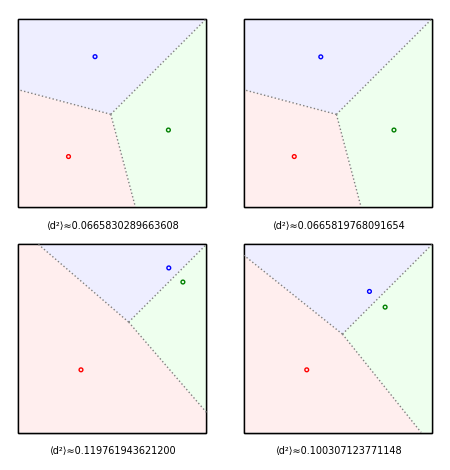

In [24]:
(t(0.267,0.408,0.798,0,0)
 + t(0.267,0.408,0.797,1.2,0)
 + t(1/3,4/5,7/8,0,-1.2)
 + t(1/3,2/3,3/4,1.2,-1.2))

In [25]:
xmid(x1,x2,y2) = cases([(x1==x2,0),
                        (true,min_symbolic(1,solve(line_12(x1,1/2,x2,y2,x) == 1/2,x)[0].rhs()))])

xtop_h(x1,x2,y2) = cases([(x1==x2,0),
                          (true,max_symbolic(0,solve(line_12(x1,1/2,x2,y2,x) == 1,x)[0].rhs()))])

ad_3h(x1,x2,y2) = \
    2*(integral(integral((x-x1)^2+(y-1/2)^2,y,1/2,1),x,0,xtop_h(x1,x2,y2))
       + integral(integral((x-x1)^2+(y-1/2)^2,y,1/2,line_12(x1,1/2,x2,y2,x)),x,xtop_h(x1,x2,y2),xmid(x1,x2,y2))
       + integral(integral((x-x2)^2+(y-y2)^2,y,line_12(x1,1/2,x2,y2,x),1),x,xtop_h(x1,x2,y2),xmid(x1,x2,y2))
       + integral(integral((x-x2)^2+(y-y2)^2,y,1/2,1),x,xmid(x1,x2,y2),1))

def t(x1,x2,y2,xoff,yoff):
    xt = xtop(x1,1/2,x2,y2)
    yt = line_12(x1,1/2,x2,y2,xt)
    xm = xmid(x1,x2,y2)
    ym = line_12(x1,1/2,x2,y2,xm)
    ad = ad_3h(x1,x2,y2)
    return (polygon([(xoff,yoff),(xoff+1,yoff),(xoff+1,yoff+1),(xoff,yoff+1)],
                    fill=None,color='black',axes=false)
            + polygon([(xoff+1,yoff+1),(xoff+xt,yoff+1),(xoff+xt,yoff+yt),
                       (xoff+xm,yoff+ym),(xoff+1,yoff+1/2)],color='#eef')
            + polygon([(xoff+1,yoff),(xoff+xt,yoff),(xoff+xt,yoff+1-yt),
                       (xoff+xm,yoff+1-ym),(xoff+1,yoff+1/2)],color='#efe')
            + polygon([(xoff,yoff+min_symbolic(1,line_12(x1,1/2,x2,y2,0))),
                       (xoff+xt,yoff+yt),(xoff+xm,yoff+ym),(xoff+xm,yoff+1-ym),
                       (xoff+xt,yoff+1-yt),
                       (xoff,yoff+1-min_symbolic(1,line_12(x1,1/2,x2,y2,0)))],
                      color='#fee')
            + line([(xoff+xt,yoff+yt),(xoff+xm,yoff+ym)],linestyle='dotted',color='gray')
            + line([(xoff+xt,yoff+1-yt),(xoff+xm,yoff+1-ym)],linestyle='dotted',color='gray')
            + line([(xoff+xm,yoff+1/2),(xoff+1,yoff+1/2)],linestyle='dotted',color='gray')
            + polygon([(xoff,yoff),(xoff+1,yoff),(xoff+1,yoff+1),(xoff,yoff+1)],
                    fill=None,color='black')
            + circle((xoff+x1,yoff+1/2),0.01,color='red')
            + circle((xoff+x2,yoff+y2),0.01,color='blue')
            + circle((xoff+x2,yoff+1-y2),0.01,color='green')
            + text(f"⟨d²⟩≈{numerical_approx(ad)}",(xoff+0.5,yoff-0.1),color='black',fontsize=7)
           )

In [26]:
def f(p):
    if p[1] < p[2]:
        return ad_3h(p[0],p[1],max(p[2],1-p[2]))
    else:
        return ad_3h(1-p[0],1-p[1],max(p[2],1-p[2]))

minimize_constrained(f, [(0,1),(0,1),(1/2,1)],
                     (1/4,3/4,3/4))

(0.1959599799836942, 0.6826514751509505, 0.7642457333191758)

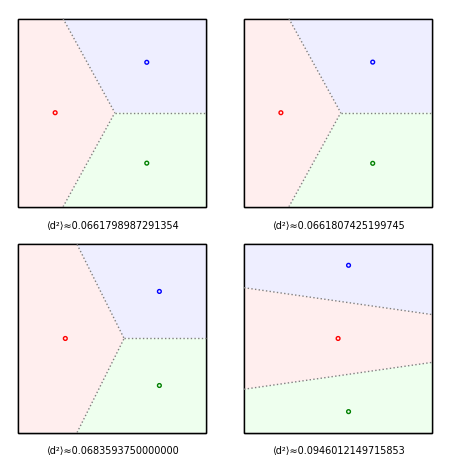

In [27]:
(t(0.196,0.683,0.768,0,0)
 + t(0.196,0.684,0.769,1.2,0)
 + t(1/4,3/4,3/4,0,-1.2)
 + t(1/2,5/9,8/9,1.2,-1.2))

So it seems that the configuration with vertical (or horizontal) symmetry has a lower
minimum average of the square of the distance than the configuration with diagonal
symmetry.  I think calculating the actual average of the actual distance will be too
difficult, though.